In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline # Importa Pipeline
from sklearn.base import BaseEstimator, TransformerMixin # Para custom transformer
import joblib
import re
from nltk.corpus import stopwords

# Descargar stopwords (solo la primera vez)
try:
    stopwords.words('spanish')
except LookupError:
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')

# --- CUSTOM TRANSFORMER PARA EL PREPROCESAMIENTO ---
# Un Pipeline solo puede tener estimadores (fit/predict) o transformadores (fit/transform).
# Nuestra función preprocess_text necesita ser envuelta en un transformador de scikit-learn.
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Puedes añadir parámetros aquí si tu preprocesamiento es configurable
        pass

    def fit(self, X, y=None):
        return self # No hay nada que "aprender" en el fit para este preprocesador simple

    def transform(self, X):
        # X es una Serie de Pandas o una lista de strings
        preprocessed_texts = [self._preprocess(text) for text in X]
        return preprocessed_texts

    def _preprocess(self, text):
        text = text.lower()
        text = re.sub(r'[^a-záéíóúüñ\s]', '', text)
        words = text.split()
        words = [word for word in words if word not in stopwords.words('spanish')]
        # Si usas stemming, descomenta:
        # from nltk.stem import PorterStemmer
        # stemmer = PorterStemmer()
        # words = [stemmer.stem(word) for word in words]
        return ' '.join(words)

if __name__ == "__main__":
    # 1. Cargar los datasets
    df_train = pd.read_csv('dataset.csv') # Tu dataset original de 20 filas
    df_test = pd.read_csv('testdata.csv') # El nuevo dataset de 30 filas

    # Definir X e y para entrenamiento y prueba
    X_train = df_train['comentario'] # Usamos la columna 'comentario' directamente
    y_train = df_train['sentimiento']
    X_test = df_test['comentario'] # Usamos la columna 'comentario' directamente
    y_test = df_test['sentimiento']

    # 2. Crear el Pipeline
    # El orden importa: primero preprocesar, luego vectorizar, finalmente clasificar
    sentiment_pipeline = Pipeline([
        ('preprocessor', TextPreprocessor()),      # Paso 1: Preprocesamiento de texto
        ('vectorizer', TfidfVectorizer(max_features=5000)), # Paso 2: Vectorización
        ('classifier', MultinomialNB())            # Paso 3: Clasificador
    ])

    # 3. Entrenar el Pipeline
    # El método .fit() del pipeline llama a fit_transform() en cada paso intermedio
    # y finalmente a fit() en el clasificador.
    print("Entrenando el pipeline...")
    sentiment_pipeline.fit(X_train, y_train)
    print("Entrenamiento completado.")

    # 4. Evaluar el Pipeline
    # El método .predict() del pipeline llama a transform() en cada paso intermedio
    # y finalmente a predict() en el clasificador.
    print("\nEvaluando el pipeline en el conjunto de prueba...")
    y_pred = sentiment_pipeline.predict(X_test)

    print("\n--- Reporte de Clasificación en el Conjunto de Prueba ---")
    print(classification_report(y_test, y_pred))
    print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.2f}")

    # 5. Guardar el Pipeline completo
    joblib.dump(sentiment_pipeline, 'sentiment_pipeline.pkl')
    print("\nPipeline completo guardado exitosamente como 'sentiment_pipeline.pkl'.")

    # Opcional: Mostrar algunas predicciones para depuración
    print("\n--- Ejemplos de Predicciones ---")
    for i in range(min(5, len(df_test))):
        comment = df_test['comentario'].iloc[i]
        predicted = sentiment_pipeline.predict([comment])[0] # El pipeline espera una lista
        print(f"Comentario: \"{comment}\"")
        print(f"Real: {df_test['sentimiento'].iloc[i]}, Predicción: {predicted}")
        print("-" * 30)

Entrenando el pipeline...
Entrenamiento completado.

Evaluando el pipeline en el conjunto de prueba...

--- Reporte de Clasificación en el Conjunto de Prueba ---
              precision    recall  f1-score   support

  "negativo"       0.00      0.00      0.00      15.0
  "positivo"       0.00      0.00      0.00      15.0
    negativo       0.00      0.00      0.00       0.0
    positivo       0.00      0.00      0.00       0.0

    accuracy                           0.00      30.0
   macro avg       0.00      0.00      0.00      30.0
weighted avg       0.00      0.00      0.00      30.0

Precisión (Accuracy): 0.00

Pipeline completo guardado exitosamente como 'sentiment_pipeline.pkl'.

--- Ejemplos de Predicciones ---
Comentario: "El servicio al cliente fue excepcional, muy amable y rápido."
Real:  "positivo", Predicción: positivo
------------------------------
Comentario: "El producto llegó defectuoso y la calidad es pésima."
Real:  "negativo", Predicción: negativo
-----------------

c:\Users\Jassir\miniconda3\envs\sci\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Jassir\miniconda3\envs\sci\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Jassir\miniconda3\envs\sci\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\

              precision    recall  f1-score   support

    negativo       0.67      0.67      0.67        15
    positivo       0.67      0.67      0.67        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              precision    recall  f1-score   support

    negativo       0.62      0.67      0.65        15
    positivo       0.64      0.60      0.62        15

    accuracy                           0.63        30
   macro avg       0.63      0.63      0.63        30
weighted avg       0.63      0.63      0.63        30



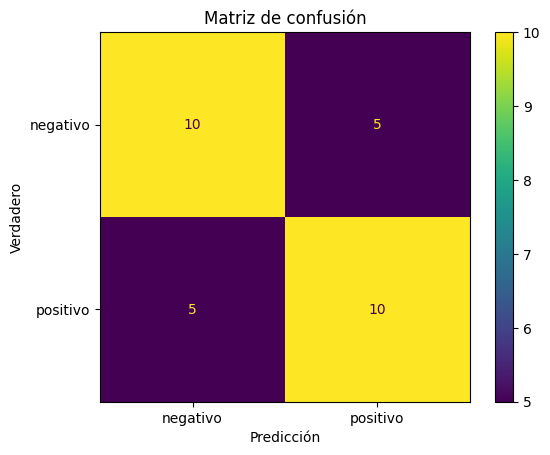

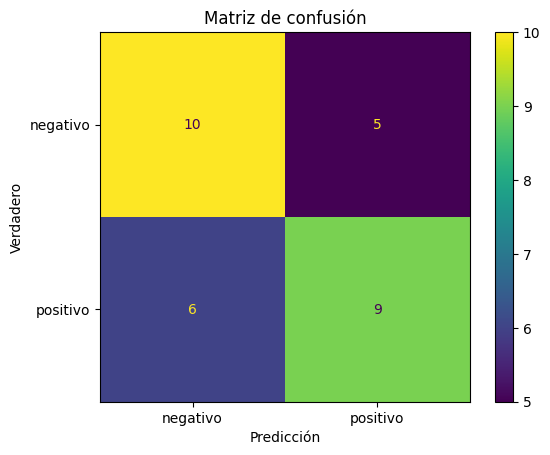

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay



#+++++++++ Training
traindata = pd.read_csv('./dataset.csv')

X = traindata['comentario'].to_list()
y = traindata['sentimiento'].to_list()

nlp = spacy.load('es_core_news_sm')

def extract_features(text):
    """
    Dado un texto preprocesado, construye un dict {lema: frecuencia}.
    Este dict luego se convierte en vector numérico con DictVectorizer.
    """
    features = {}
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct:
            key = token.lemma_.lower()
            features[key] = features.get(key, 0) + 1
    return features

traindata['features'] = traindata['comentario'].apply(lambda x: extract_features(x))
X_new = traindata['features']

#++++ models
model = Pipeline([
    ('tfidf', DictVectorizer(sparse=False)),
    ('bayes', MultinomialNB(class_prior=[0.45, 0.55]))
    ])

model2 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('spanish'))),
    ('bayes', MultinomialNB(class_prior=[0.45, 0.55]))
    ])

model.fit(X_new, y)
model2.fit(X, y)

#+++++++++ Testing
testdata = pd.read_csv('./testdata.csv')

X_test = testdata['comentario'].to_list()
y_test = testdata['sentimiento'].to_list()

X_test_new = testdata['features'] = testdata['comentario'].apply(lambda x: extract_features(x))

y_pred = model.predict(X_test_new)
y_pred_2 = model2.predict(X_test)

#+++++++++ Report
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_2))

# Plotear
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=['negativo', 'positivo'])

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['negativo', 'positivo']
)

disp.plot()
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")


cm = confusion_matrix(y_true=y_test, y_pred=y_pred_2, labels=['negativo', 'positivo'])

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['negativo', 'positivo']
)

disp.plot()
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


plt.show()

In [96]:
# Predict new reviews
positive_comments = [
    "Me encantó este producto, superó mis expectativas.",
    "El servicio al cliente fue excepcional.",
    "Muy buena calidad, definitivamente lo recomendaré.",
    "La entrega llegó antes de lo esperado.",
    "Excelente experiencia de compra.",
    "El diseño es hermoso y muy práctico.",
    "Estoy muy satisfecho con la atención recibida.",
    "La relación calidad-precio es insuperable.",
    "Funcionó perfectamente desde el primer momento.",
    "El producto es tal cual lo describe la página.",
    "Gran rapidez en el envío.",
    "La interfaz es muy intuitiva y fácil de usar.",
    "Quedé encantado con los resultados.",
    "La atención fue muy amable y profesional.",
    "El empaque estaba en perfectas condiciones.",
    "Me gustó mucho la presentación y los detalles.",
    "El rendimiento es sobresaliente.",
    "La experiencia de usuario es muy fluida.",
    "Superó mis expectativas en todos los aspectos.",
    "Es justo lo que estaba buscando.",
    "Lo volvería a comprar sin pensarlo.",
    "El soporte técnico resolvió mi duda rápidamente.",
    "La calidad de los materiales es excelente.",
    "Me siento muy bien con mi compra.",
    "Todo funcionó de manera impecable.",
    "La app es muy estable y rápida.",
    "El producto es muy durable.",
    "La atención posventa fue muy eficiente.",
    "Estoy muy contento con la compra.",
    "Totalmente recomendado."
]

negative_comments = [
    "No me gustó este producto, llegó en mal estado.",
    "La calidad es muy pobre y decepcionante.",
    "Servicio al cliente inexistente, nadie responde.",
    "Nunca volvería a comprar esto.",
    "No funciona como prometieron en la descripción.",
    "Experiencia de compra muy mala.",
    "El envío tardó muchísimo más de lo indicado.",
    "El empaque llegó abierto y dañado.",
    "El producto no cumple con lo que ofrece.",
    "Precio excesivo para lo que ofrece.",
    "La interfaz es confusa y poco intuitiva.",
    "El diseño es incómodo de usar.",
    "Las instrucciones vienen incompletas.",
    "Tuve muchos problemas para instalarlo.",
    "No vale lo que cuesta.",
    "El soporte técnico no me brindó solución.",
    "Faltan piezas en el paquete recibido.",
    "La batería se agota en minutos.",
    "El material se siente de baja calidad.",
    "La aplicación se cierra sola constantemente.",
    "Recibí un artículo totalmente distinto al pedido.",
    "La atención posventa fue muy deficiente.",
    "No detecta correctamente los datos ingresados.",
    "El audio sale distorsionado y bajo.",
    "La configuración es demasiado complicada.",
    "Tuve que devolverlo de inmediato.",
    "No lo recomendaría a nadie.",
    "Mal empaquetado y entrega retrasada.",
    "Se rompió en el primer uso.",
    "No cumple en absoluto con mis expectativas."
]

def calculate_comments(reviews):
    c_pos = 0
    c_neg = 0
    for t in reviews:
        # features_extracted = extract_features(t)
        pred_res = model2.predict(X=[t])
        if pred_res == 'positivo':
            c_pos += 1
        else:
            c_neg += 1

        # print(pred_res, model.predict_proba(features_extracted))

    print(f'Positive: {c_pos}', f'Negative: {c_neg}', f'TOTAL {c_pos + c_neg}')

calculate_comments(negative_comments)
calculate_comments(positive_comments)


Positive: 21 Negative: 9 TOTAL 30
Positive: 26 Negative: 4 TOTAL 30


In [ ]:
import spacy

def preprocess_text(text):
    """
    Realiza el preprocesamiento básico de un texto en idioma español utilizando spaCy.

    Args:
        text (str): El texto a ser preprocesado.

    Returns:
        str: El texto preprocesado.
    """
    nlp = spacy.load('es_core_news_sm')
    doc = nlp(text)

    # Eliminación de palabras irrelevantes (stopwords) y signos de puntuación
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    # Reconstrucción del texto preprocesado
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


def extract_features(text):
    """
    Extrae las características del texto utilizando spaCy y devuelve un diccionario de características.

    Args:
        text (str): El texto del cual extraer características.

    Returns:
        dict: Un diccionario que representa las características extraídas del texto.
    """
    features = {}
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct:
            if token.lemma_.lower() in features:
                features[token.lemma_.lower()] += 1
            else:
                features[token.lemma_.lower()] = 1
    return features


from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB

traininig_data = pd.read_csv('./dataset.csv')
X = traindata['comentario']
y = traindata['sentimiento']

# Preprocesamiento de los datos de entrenamiento
preprocessed_training_data = [(preprocess_text(text), label) for text, label in zip(X, y)]

# Extracción de características de los datos de entrenamiento
training_features = [extract_features(text) for text, _ in preprocessed_training_data]
vectorizer = DictVectorizer(sparse=False)
X_train = vectorizer.fit_transform(training_features)

# Etiquetas de los datos de entrenamiento
y_train = [label for _, label in preprocessed_training_data]

# Entrenamiento del clasificador Naive Bayes
classifier = MultinomialNB()
_ = classifier.fit(X_train, y_train)


In [100]:
X_test_new_2 = testdata['features'] = testdata['comentario'].apply(lambda x: preprocess_text(x)).apply(lambda x: extract_features(x))

y_pred_nlp = model.predict(X_test_new_2)



print(classification_report(y_test, y_pred_nlp))

              precision    recall  f1-score   support

    negativo       0.67      0.67      0.67        15
    positivo       0.67      0.67      0.67        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30



In [103]:
y_pred_nlp

array(['positivo', 'negativo', 'positivo', 'positivo', 'positivo',
       'negativo', 'positivo', 'negativo', 'negativo', 'negativo',
       'positivo', 'negativo', 'positivo', 'positivo', 'positivo',
       'negativo', 'negativo', 'negativo', 'negativo', 'negativo',
       'negativo', 'negativo', 'positivo', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'negativo', 'negativo'],
      dtype='<U8')

Text(0, 0.5, 'Verdadero')

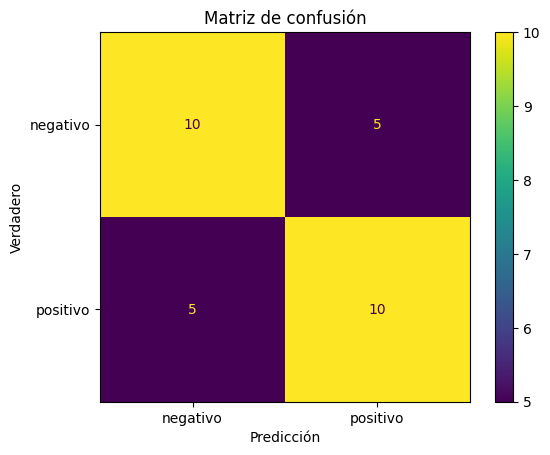

In [104]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_nlp)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['negativo', 'positivo']
)

disp.plot()
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")

In [99]:
# Nuevo texto para clasificar
new_text = "Me encantó mucho del concierto."


for t in positive_comments:
    # Preprocesamiento del nuevo texto
    preprocessed_text = preprocess_text(t)

    # Extracción de características del nuevo texto
    features = extract_features(preprocessed_text)
    X_test = vectorizer.transform([features])

    # Clasificación del nuevo texto
    sentiment = classifier.predict(X_test)
    print("Sentimiento:", sentiment[0])

Sentimiento: positivo
Sentimiento: positivo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: positivo
Sentimiento: positivo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: positivo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: positivo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: positivo
Sentimiento: positivo
Sentimiento: positivo
Sentimiento: negativo
Sentimiento: positivo
Sentimiento: positivo
Sentimiento: negativo
Sentimiento: positivo
Sentimiento: negativo
Sentimiento: negativo
Sentimiento: positivo
Sentimiento: positivo


In [118]:
import spacy

def preprocess_text(text):
    """
    Realiza el preprocesamiento básico de un texto en idioma español utilizando spaCy.

    Args:
        text (str): El texto a ser preprocesado.

    Returns:
        str: El texto preprocesado.
    """
    nlp = spacy.load('es_core_news_sm')
    doc = nlp(text)

    # Eliminación de palabras irrelevantes (stopwords) y signos de puntuación
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    # Reconstrucción del texto preprocesado
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


def extract_features(text):
    """
    Extrae las características del texto utilizando spaCy y devuelve un diccionario de características.

    Args:
        text (str): El texto del cual extraer características.

    Returns:
        dict: Un diccionario que representa las características extraídas del texto.
    """
    features = {}
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct:
            if token.lemma_.lower() in features:
                features[token.lemma_.lower()] += 1
            else:
                features[token.lemma_.lower()] = 1
    return features


from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB

model_last = Pipeline(
    [
        ('tfidf', TfidfVectorizer()),
        ('nb', MultinomialNB())
    ]
)

traininig_data = pd.read_csv('./dataset.csv')
X = traindata['comentario']
y = traindata['sentimiento']

# Preprocesamiento de los datos de entrenamiento
traindata['comentario_token'] = traindata['comentario'].apply(lambda x: preprocess_text(x))
X_train_last = traindata['comentario_token'].to_list()

model_last.fit(X_train_last, y)

,steps,"[('tfidf', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [125]:
# X_test_new_2 = testdata['comentario'].apply(lambda x: preprocess_text(x)).to_list()

y_pred_nlp = model.predict('Me funciona bien')
# print(classification_report(y_test, y_pred_nlp))

AttributeError: 'str' object has no attribute 'items'

In [126]:
doc = nlp('me funciona perfectamente')

In [ ]:
doc.

me funciona perfectamente

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_nlp)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['negativo', 'positivo']
)

disp.plot()
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")